- Date/Time: The timestamp indicating when the weather data was recorded (in day/month/year hour:minute format).

- Temp_C: The temperature in degrees Celsius at the given time.

- Dew Point Temp_C: The dew point temperature in degrees Celsius, which is the temperature at which air becomes saturated with moisture and water vapor begins to condense.

- Rel Hum_%: The relative humidity, expressed as a percentage. This indicates the amount of moisture in the air relative to the maximum amount of moisture the air can hold at a given temperature.

- Wind Speed_km/h: The wind speed in kilometers per hour at the recorded time.

- Visibility_km: The visibility in kilometers, indicating how far one can see at the recorded time (due to weather conditions like fog, rain, etc.).

- Press_kPa: The atmospheric pressure in kilopascals (kPa), which reflects the weight of the air above us. Atmospheric pressure can be indicative of weather patterns, with higher pressure generally suggesting fair weather and lower pressure suggesting stormy or unsettled weather.

- Weather: The weather condition at the given time. It could include multiple conditions like "Fog," "Freezing Drizzle," etc.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Weather_Data.csv")

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.shape

(8784, 8)

In [6]:
df.isnull().sum()

,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


In [23]:
df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
 8   Date              8784 non-null   object        
 9   Fog               8784 non-null   bool          
 10  Freezing Drizzle  8784 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 634.9+ KB


In [26]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [29]:
df.nunique()

,0
Date/Time,8784
Temp_C,533
Dew Point Temp_C,489
Rel Hum_%,83
Wind Speed_km/h,34
Visibility_km,24
Press_kPa,518
Weather,50
Date,366
Fog,2


In [30]:
df.Weather.value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [7]:
# Convert 'Date/Time' to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [8]:
# Create a column for the date (without time) to group by day
df['Date'] = df['Date/Time'].dt.date

In [9]:
# Weather Event Categorization: create a column for individual weather events
df['Fog'] = df['Weather'].str.contains('Fog', case=False)
df['Freezing Drizzle'] = df['Weather'].str.contains('Freezing Drizzle', case=False)

In [10]:
# Calculate daily probabilities of weather events
daily_weather = df.groupby('Date').agg({
    'Fog': 'sum',
    'Freezing Drizzle': 'sum'
})

In [11]:
# Calculate the total number of records for each day
daily_weather['Total'] = df.groupby('Date').size()

In [12]:
# Calculate the probabilities of each event for each day
daily_weather['Fog Probability'] = daily_weather['Fog'] / daily_weather['Total']
daily_weather['Freezing Drizzle Probability'] = daily_weather['Freezing Drizzle'] / daily_weather['Total']

In [14]:
# Display the daily weather event probabilities
daily_weather

,Fog,Freezing Drizzle,Total,Fog Probability,Freezing Drizzle Probability
Date,,,,,
2012-01-01,16,2,24,0.666667,0.083333
2012-01-02,0,0,24,0.000000,0.000000
2012-01-03,0,0,24,0.000000,0.000000
2012-01-04,0,0,24,0.000000,0.000000
2012-01-05,0,0,24,0.000000,0.000000
...,...,...,...,...,...
2012-12-27,0,2,24,0.000000,0.083333
2012-12-28,0,3,24,0.000000,0.125000
2012-12-29,19,0,24,0.791667,0.000000


<Figure size 1200x600 with 0 Axes>

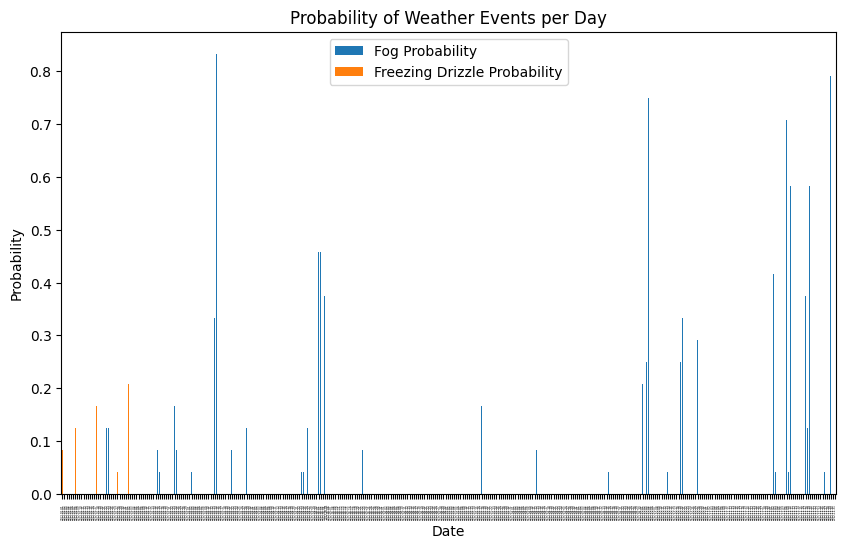

In [22]:
plt.figure(figsize=(12, 6))  # Adjust width and height

# Plotting the bar chart
daily_weather[['Fog Probability', 'Freezing Drizzle Probability']].plot(kind='bar', figsize=(10, 6))
plt.title('Probability of Weather Events per Day')
plt.ylabel('Probability')
plt.xlabel('Date')

# Adjusting x-axis labels
plt.xticks(rotation=90, fontsize=2)  # Rotate labels by 90 degrees and set font size
plt.show()
